<a href="https://colab.research.google.com/github/hadagarcia/tinyML/blob/main/notebooks/2_2_12_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring DNN learning with TensorFlow

In this assignment we'll dive a little deeper with a series of hands on exercises to better understand DNN learning with Tensorflow. Remember that if you are taking the class for a certificate we will be asking you questions about the assignment in the test!

We start by setting up the problem for you.

In [14]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Define the base model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



4423680/4422102 [==============================] - 0s 0us/step


In [4]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. One practitioners often use is the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [5]:
training_images  = training_images / 255
test_images = test_images / 255

In [10]:
training_images[0], training_labels[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

Label:  9


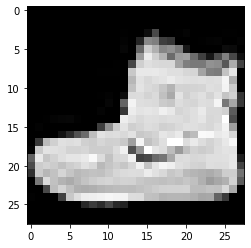

In [17]:
plt.imshow(training_images[0], cmap='gray')
print('Label: ', training_labels[0])

Using these improved images lets compile our model using an adaptive optimizer to learn faster and a categorical loss function to differentiate between the the various classes we are trying to classify. Since this is a very simple dataset we will only train for 5 epochs.

In [7]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model to the training data
model.fit(training_images, training_labels, epochs=5)

# test the model on the test data
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5861 - accuracy: 0.7942
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3724 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3213 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2926 - accuracy: 0.8914
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.8629


[0.38393157720565796, 0.8629000186920166]

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.8658. This tells you that your neural network is about 89% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 89% of the time. But how would it work with unseen data? That's why we have the test images. We can call ```model.evaluate```, and pass in the two sets, and it will report back the loss for each. This should reach about .8747 or thereabouts, showing about 87% accuracy. Not Bad!

But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

In [20]:
classifications = model.predict(test_images)
print(classifications[1])

[1.1455151e-04 5.2506350e-11 9.9338704e-01 1.4964666e-09 2.3300333e-03
 1.8277138e-12 4.1684643e-03 2.3116498e-16 1.2072608e-10 5.0830705e-13]


In [21]:
np.argmax(classifications[1])

2

In [22]:
test_labels[1]

2

In [12]:
# Labels
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Let's now look at the layers in your model. What happens if you double the number of neurons in the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [23]:
%%time
NUMBER_OF_NEURONS = 512 * 2

# define the new model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(NUMBER_OF_NEURONS, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5888 - accuracy: 0.7928
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3625 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3250 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2957 - accuracy: 0.8885
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8817
CPU times: user 1min 52s, sys: 4.89 s, total: 1min 57s
Wall time: 1min 15s


**Dense Layer with double neurons size conclusions** </br>

> The **loss decreased** a bit, from loss: *0.3839* to loss: *0.3271*
The **accuracy improved** a bit as well, from: *0.8629* to **0.8817**

---



Consider the effects of additional layers in the network instead of simply more neurons to the same layer. First update the model to add an additional dense layer into the model between the two existing Dense layers.

In [27]:
YOUR_NEW_LAYER = tf.keras.layers.Dense(1024, activation=tf.nn.relu)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Lets then compile, fit, and evaluate our model. What happens to the error? How does this compare to the original model and the model with double the number of neurons?

In [28]:
%%time
# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5705 - accuracy: 0.7924
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3609 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3221 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2986 - accuracy: 0.8884
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8704
CPU times: user 3min 10s, sys: 8.48 s, total: 3min 18s
Wall time: 2min 4s


**Adding another Dense Layer with double neurons size conclusions** </br>

> It performed not better than the previous model, I'd expect it to perform a bit better, since I added another Dense Layer.
Also the time increased double, from 1:15 to 2:04

---



Before you trained, you normalized the data. What would be the impact of removing that? To see it for yourself fill in the following lines of code to get a non-normalized set of data and then re-fit and evaluate the model using this data.

In [29]:
%%time
# get new non-normalized mnist data
training_images_non = training_images * 255
test_images_non = test_images * 255

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images_non, training_labels, epochs=5)
model.evaluate(test_images_non, test_labels)
classifications = model.predict(test_images_non)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 4.9054 - accuracy: 0.6848
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5133 - accuracy: 0.8211
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4801 - accuracy: 0.8370
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4576 - accuracy: 0.8454
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4579 - accuracy: 0.8512
CPU times: user 3min 11s, sys: 8.77 s, total: 3min 20s
Wall time: 2min 5s


**non-normalized data conclusions** </br>

> Obviously it performed as expected. Working with RGB non-normalized images doesn't improve the training. It's better to work with values on the range [0, 1]

---



Sometimes if you set the training for too many epochs you may find that training stops improving and you wish you could quit early. Good news, you can! TensorFlow has a function called ```Callbacks``` which can check the results from each epoch. Modify this callback function to make sure it exits training early but not before reaching at least the second epoch!

*A hint: logs.get(METRIC_NAME) will return the value of METRIC_NAME at the current step*

In [30]:
%%time
# define and instantiate your custom Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if( logs.get('accuracy') > 0.86): # it reached before 0.8704, so I think 0.86 is enough
      self.model.stop_training = True
callbacks = myCallback()

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(512, activation=tf.nn.relu),
                            YOUR_NEW_LAYER,
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
      loss = 'sparse_categorical_crossentropy',
      metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5753 - accuracy: 0.7927
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3694 - accuracy: 0.8629
CPU times: user 1min 13s, sys: 3.28 s, total: 1min 17s
Wall time: 48.1 s


Not sure why it reached accuracy of 0.8629 just on the second Epoch. But the Callback worked, it exits correctly.